In [22]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import ConfusionMatrixDisplay
# Functions for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [2]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Rainfall_Forecast.csv')
# Colab
df = pd.read_csv('/content/drive/MyDrive/MSFT1.csv')
df

,Date,Direction,Lag_1,Lag_2,Lag_3
0,6/6/2014,1,41.209999,40.320000,40.290001
1,9/6/2014,0,41.480000,41.209999,40.320000
2,10/6/2014,0,41.270000,41.480000,41.209999
3,11/6/2014,0,41.110001,41.270000,41.480000
4,12/6/2014,0,40.860001,41.110001,41.270000
...,...,...,...,...,...
2256,23/5/2023,0,321.179993,318.339996,318.519989
2257,24/5/2023,0,315.260010,321.179993,318.339996
2258,25/5/2023,1,313.850006,315.260010,321.179993
2259,26/5/2023,1,325.920013,313.850006,315.260010


In [3]:
# Date is converted into special data type of pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2261 non-null   object 
 1   Direction  2261 non-null   int64  
 2   Lag_1      2261 non-null   float64
 3   Lag_2      2261 non-null   float64
 4   Lag_3      2261 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 88.4+ KB


In [3]:
# View descriptive statistics of target variable
# Pandas will automatically ignore date if the correct data type has been converted
new_df = df
new_df.describe()

,Direction,Lag_1,Lag_2,Lag_3
count,2261.000000,2261.000000,2261.000000,2261.000000
mean,0.526316,142.422322,142.292923,142.166594
std,0.499417,91.683389,91.620891,91.564489
min,0.000000,40.290001,40.290001,40.290001
25%,0.000000,57.430000,57.419998,57.419998
50%,1.000000,108.400002,108.300003,108.290001
75%,1.000000,231.600006,231.320007,230.720001
max,1.000000,343.109985,343.109985,343.109985


In [4]:
# Drop out missing values and rest index
clean_df=new_df.dropna(axis=0, how='any').copy()
clean_df=clean_df.reset_index(drop=True)
clean_df

,Date,Direction,Lag_1,Lag_2,Lag_3
0,6/6/2014,1,41.209999,40.320000,40.290001
1,9/6/2014,0,41.480000,41.209999,40.320000
2,10/6/2014,0,41.270000,41.480000,41.209999
3,11/6/2014,0,41.110001,41.270000,41.480000
4,12/6/2014,0,40.860001,41.110001,41.270000
...,...,...,...,...,...
2256,23/5/2023,0,321.179993,318.339996,318.519989
2257,24/5/2023,0,315.260010,321.179993,318.339996
2258,25/5/2023,1,313.850006,315.260010,321.179993
2259,26/5/2023,1,325.920013,313.850006,315.260010


In [7]:
# Train data
x=clean_df.drop(['Date','Direction'],axis=1).copy()
x.head()

,Lag_1,Lag_2,Lag_3
0,41.209999,40.320000,40.290001
1,41.480000,41.209999,40.320000
2,41.270000,41.480000,41.209999
3,41.110001,41.270000,41.480000
4,40.860001,41.110001,41.270000


In [10]:
# Test data
y=clean_df['Direction'].copy()
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Direction, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [12]:
x_train_tuning,x_valid,y_train_tuining,y_valid = train_test_split(x_train,y_train,test_size=0.2,shuffle=False)

In [13]:
##1
#set x (make prediction)
# Train
#x_train=Rol_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train_tuning)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train

,0,1,2
0,0.006199,0.000202,0.000000
1,0.008018,0.006199,0.000202
2,0.006603,0.008018,0.006199
3,0.005525,0.006603,0.008018
4,0.003841,0.005525,0.006603
...,...,...,...
1441,0.875143,0.860993,0.879995
1442,0.794353,0.875143,0.860993
1443,0.820160,0.794353,0.875143
1444,0.892797,0.820160,0.794353


In [16]:
def create_model(learning_rate=0.01):
  # 6.1 Create the model
  clear.clear_session()
  model=Sequential()

  # 6.2 Add input layer & first hidden layer
  model.add(Dense(units=6, input_dim=3, activation='relu'))

  # 6.3 Add second hidden layer
  model.add(Dense(units=12, activation='linear'))

  #model.add(Dropout(rate=0.2))

  # 6.4 Add third hidden layer
  model.add(Dense(units=24, activation='linear'))

  model.add(Dense(units=48, activation='relu'))

  #model.add(Dropout(rate=0.4))

  model.add(Dense(units=96, activation='relu'))

  # 6.5 Add output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # 6.6 Compile the defined Net
  #opt=SGD(learning_rate=0.001,momentum=0.5)
  opt=Adam(learning_rate=learning_rate,beta_1=0.95)
  model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

  # Finally check the model
  return model

model = KerasClassifier(build_fn=create_model, epochs=100,verbose=0)
cv_inner = TimeSeriesSplit(n_splits=3)
learning_rate = [0.01,0.001,0.0001]
batch_size = [32,64]
param_grid = dict(batch_size=batch_size,learning_rate=learning_rate)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=cv_inner,scoring='roc_auc',n_jobs=-1)
grid_result = grid.fit(scaled_x_train,y_train_tuining)

print("Best:%fusing%s"%(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-16-5b1003106898>:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100,verbose=0)


Best:0.523110using{'batch_size': 64, 'learning_rate': 0.001}
0.504165 (0.005825) with: {'batch_size': 32, 'learning_rate': 0.01}
0.499855 (0.019575) with: {'batch_size': 32, 'learning_rate': 0.001}
0.521661 (0.012878) with: {'batch_size': 32, 'learning_rate': 0.0001}
0.485881 (0.022064) with: {'batch_size': 64, 'learning_rate': 0.01}
0.523110 (0.005452) with: {'batch_size': 64, 'learning_rate': 0.001}
0.522990 (0.009788) with: {'batch_size': 64, 'learning_rate': 0.0001}


In [6]:
# Train data
Forecast_train_data=clean_df.iloc[0:1812,:].copy()
Forecast_train_data

,Date,Direction,Lag_1,Lag_2,Lag_3
0,6/6/2014,1,41.209999,40.320000,40.290001
1,9/6/2014,0,41.480000,41.209999,40.320000
2,10/6/2014,0,41.270000,41.480000,41.209999
3,11/6/2014,0,41.110001,41.270000,41.480000
4,12/6/2014,0,40.860001,41.110001,41.270000
...,...,...,...,...,...
1807,10/8/2021,0,288.329987,289.459991,289.519989
1808,11/8/2021,1,286.440002,288.329987,289.459991
1809,12/8/2021,1,286.950012,286.440002,288.329987
1810,13/8/2021,1,289.809998,286.950012,286.440002


In [7]:
# Test data
Forecast_test_data=clean_df.iloc[1812:2265,:].copy()
Forecast_test_data

,Date,Direction,Lag_1,Lag_2,Lag_3
1812,17/8/2021,0,294.600006,292.850006,289.809998
1813,18/8/2021,0,293.079987,294.600006,292.850006
1814,19/8/2021,1,290.730011,293.079987,294.600006
1815,20/8/2021,1,296.769989,290.730011,293.079987
1816,23/8/2021,1,304.359985,296.769989,290.730011
...,...,...,...,...,...
2256,23/5/2023,0,321.179993,318.339996,318.519989
2257,24/5/2023,0,315.260010,321.179993,318.339996
2258,25/5/2023,1,313.850006,315.260010,321.179993
2259,26/5/2023,1,325.920013,313.850006,315.260010


In [8]:
# X all train data
x_forecast_train=Forecast_train_data.drop(['Date','Direction'],axis=1).copy()
# Y all train data
y_forecast_train=Forecast_train_data['Direction'].copy()

In [9]:
# Create the model
clear.clear_session()
Fmodel=Sequential()

# 6.2 Add input layer & first hidden layer
Fmodel.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
Fmodel.add(Dense(units=12, activation='linear'))

#Fmodel.add(Dropout(rate=0.2))

# 6.4 Add third hidden layer
Fmodel.add(Dense(units=24, activation='linear'))

Fmodel.add(Dense(units=48, activation='relu'))

#Fmodel.add(Dropout(rate=0.4))

Fmodel.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
Fmodel.add(Dense(units=1, activation='sigmoid'))

# Compile the defined Net
#opt=SGD(learning_rate=0.001,momentum=0.5)
opt=Adam(learning_rate=0.001,beta_1=0.95)
Fmodel.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model
Fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dense_5 (Dense)             (None, 1)                 97        
                                                                 
Total params: 6,421
Trainable params: 6,421
Non-trainabl

In [10]:
# Store in the history for more useful information
history=Fmodel.fit(x_forecast_train, y_forecast_train, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 1s 5ms/step - loss: 2.2817 - accuracy: 0.5017
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.8390 - accuracy: 0.5166
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7148 - accuracy: 0.4983
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7184 - accuracy: 0.5105
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7885 - accuracy: 0.5215
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.8025 - accuracy: 0.5088
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7854 - accuracy: 0.5265
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7352 - accuracy: 0.5044
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 0.8173 - accuracy: 0.5039
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7832 - accuracy: 0.5072
Epoch 11/

In [11]:
# 7.3 Save the trained model
#Fmodel.save('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
Fmodel.save('House_Rent_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [12]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('/content/House_Rent_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [13]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Direction'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Direction'].copy()

In [14]:
# 8.1 Make prediction
prediction=ANN_model.predict_on_batch(x_forecast_test)
prediction

array([[0.54514533],
       [0.5749404 ],
       [0.58070976],
       [0.500586  ],
       [0.49421394],
       [0.5642098 ],
       [0.5806446 ],
       [0.5646995 ],
       [0.5883676 ],
       [0.5515701 ],
       [0.5247184 ],
       [0.5796982 ],
       [0.55926734],
       [0.56659174],
       [0.5596268 ],
       [0.5692873 ],
       [0.558869  ],
       [0.5888903 ],
       [0.5724259 ],
       [0.54616743],
       [0.5346982 ],
       [0.5157851 ],
       [0.56118065],
       [0.613127  ],
       [0.6106637 ],
       [0.549857  ],
       [0.5246143 ],
       [0.55379695],
       [0.5625543 ],
       [0.6101647 ],
       [0.6575427 ],
       [0.5448356 ],
       [0.57789564],
       [0.48873895],
       [0.61445177],
       [0.49988228],
       [0.52259934],
       [0.54636526],
       [0.56047475],
       [0.564882  ],
       [0.5716145 ],
       [0.5259932 ],
       [0.5026367 ],
       [0.5522802 ],
       [0.53347564],
       [0.5550434 ],
       [0.56969804],
       [0.529

In [15]:
# 8.2 Transform the predictions to 0 and 1
testing_prediction=(ANN_model.predict_on_batch(x_forecast_test) >= 0.5).astype('int')
testing_prediction

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [16]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_forecast_test,testing_prediction)
testing_f1s=f1_score(y_forecast_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_forecast_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_forecast_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_forecast_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_forecast_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 45.21
Testing f1s: 59.14
Testing pre: 45.99
Testing sen: 82.79
Testing spe: 10.68

Testing confusion matrix:
[[ 25 209]
 [ 37 178]]


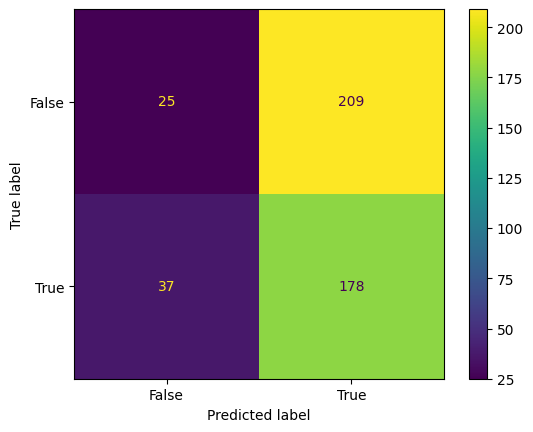

In [23]:
testing_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = testing_cm, display_labels = [False, True])
testing_cm_display.plot()
plt.show()

In [24]:
predictions_NN_prob = Fmodel.predict(x_forecast_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

15/15 [==============================] - 0s 2ms/step


In [26]:
acc_NN = accuracy_score(y_forecast_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.4521158129175947


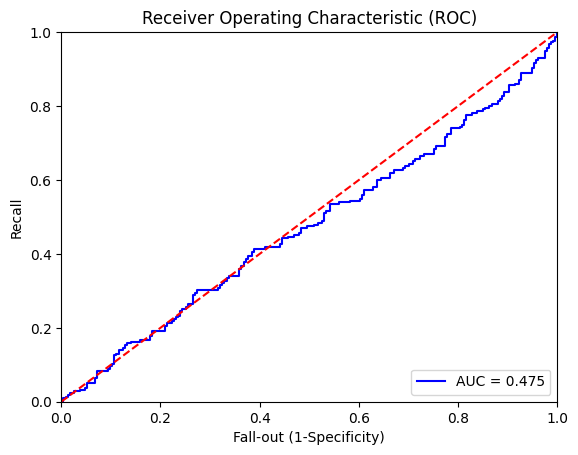

In [28]:
#Print Area Under Curve ROC/AUC,reporting AUC values
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(y_forecast_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()